In [1]:
import numpy as np
import matplotlib.pyplot as plt
from traffic import *
import cProfile

### Without slowing (Figure 3)

In [6]:
L = 400
POINTS = 10
ITERATIONS = 1000

In [7]:
x, mean_flow, std = calculate_flows(points=POINTS, L=L, iterations=ITERATIONS)

In [8]:
x, mean_flow_slow, std_slow = calculate_flows(points=POINTS, L=L, iterations=ITERATIONS, slowed=True)

In [11]:
x, mean_flow_lanes, std_lanes = calculate_flows(points=POINTS, L=L, iterations=ITERATIONS, lanes=True)

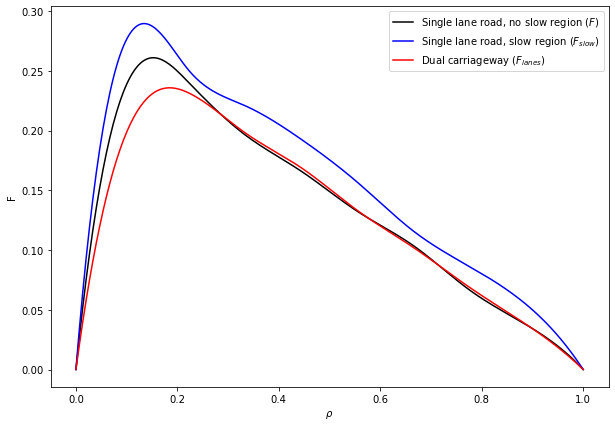

In [14]:
from scipy.interpolate import make_interp_spline, BSpline

xnew = np.linspace(x.min(), x.max(), 300)

step=10
spl_default = make_interp_spline(x, mean_flow, k=3)
spl_lanes = make_interp_spline(x, mean_flow_lanes, k=3)
spl_slow = make_interp_spline(x, mean_flow_slow, k=3)

flow_smooth = spl_default(xnew)
flow_smooth_lanes = spl_lanes(xnew)
flow_smooth_slow = spl_slow(xnew)

plt.figure(figsize=(10, 7))
plt.plot(xnew, flow_smooth, color='black', label='Single lane road, no slow region ($F$)')
plt.plot(xnew, flow_smooth_lanes, color='blue', label='Single lane road, slow region ($F_{slow}$)')
plt.plot(xnew, flow_smooth_slow, color='red', label='Dual carriageway ($F_{lanes}$)')
plt.xlabel('$\\rho$')
plt.ylabel('F')
plt.legend()
plt.savefig('cover graph.png', dpi=300)
plt.show()